<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/practice/project2_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 준비하기

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#랜덤 시드 고정시키기
np.random.seed(5)


In [ ]:
dataset = np.loadtxt('/content/project2.csv', delimiter=',',skiprows=1)
dataset

array([[0.000e+00, 1.000e+00, 1.400e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.200e+01, ..., 3.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 1.000e+00, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [2.807e+03, 1.200e+01, 3.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.808e+03, 1.200e+01, 1.100e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.809e+03, 1.200e+01, 1.100e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
X_train = dataset[:2388,0:8]
y_train = dataset[:2388,8]
X_test = dataset[422:,0:8]
y_test = dataset[422:,8]

모델 구성하기

In [ ]:

model = Sequential()
model.add(Dense(16,input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

모델 학습시키기

In [ ]:

history = model.fit(X_train,y_train,
                    epochs=1500,
                    batch_size=64)


Epoch 1/1500
38/38 [==============================] - 13s 1ms/step - loss: 43.5259 - accuracy: 0.5446
Epoch 2/1500
38/38 [==============================] - 0s 1ms/step - loss: 5.3531 - accuracy: 0.4965
Epoch 3/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.9041 - accuracy: 0.4801
Epoch 4/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7416 - accuracy: 0.5035
Epoch 5/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7292 - accuracy: 0.4885
Epoch 6/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7217 - accuracy: 0.4921
Epoch 7/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.5041
Epoch 8/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.5132
Epoch 9/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7244 - accuracy: 0.4985
Epoch 10/1500
38/38 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.48

학습 결과 그려보기

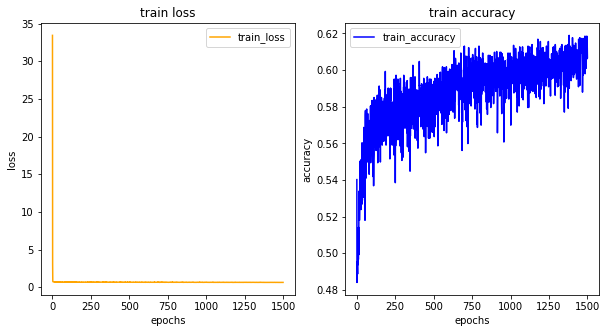

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
scores = model.evaluate(X_test,y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

75/75 [==============================] - 1s 965us/step - loss: 0.6555 - accuracy: 0.6039
accuracy: 60.39%


모델 성능평가

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [ ]:
# 모델 예측하기
result = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn import metrics
report = metrics.classification_report(y_test,result)
print(report)

              precision    recall  f1-score   support

         0.0       0.61      0.50      0.55      1154
         1.0       0.60      0.70      0.65      1234

    accuracy                           0.60      2388
   macro avg       0.60      0.60      0.60      2388
weighted avg       0.60      0.60      0.60      2388



In [ ]:
print(metrics.precision_score(y_test,result))
print(metrics.recall_score(y_test,result))

0.6
0.700162074554295


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


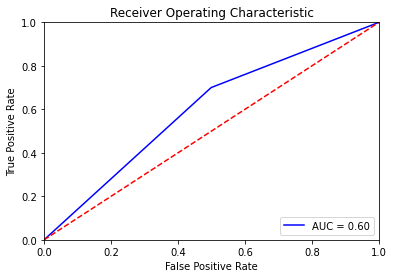

In [ ]:
plot_auc_roc(model)